## Introduction:

The rapid adoption of Electric Vehicles (EVs) globally marks a pivotal shift in the transportation and energy sectors. This change is fueled by rising environmental concerns, supportive government policies, technological advancements, and increasing consumer demand. Understanding the trends in EV growth is essential for stakeholders ranging from policymakers to industry leaders and investors.

# Dataset Overview :
The analysis uses the IEA Global EV Data 2024 dataset sourced from Kaggle.
It contains key variables such as:

Region (eg- india, china etc.)

Category (eg-Historical, Projection-STEPS, Projection-APS)

Parameter (eg-EV stock share, EV sales share, EV sales, EV stock,
       EV charging points etc.)

Mode (eg- cars, vehicals etc.)

Powertrain (eg- EV, BEV, PHEV etc. )

Year

Value (quantitative metric like number of vehicles or charging points)

## Objective of the Analysis:

The primary goals of this analysis are to:

Track global EV adoption trends over time and by region.

Compare EV growth with supporting infrastructure (like charging points).

Identify under-supported regions where EV growth outpaces infrastructure development.

Analyze the share of EVs in total vehicle sales across years and regions.

Forecast future EV growth using historical data to inform strategic decisions.



In [1]:
## first import all which are required to do EDA


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from warnings import filterwarnings 
filterwarnings('ignore')
import random

In [2]:
## now we have to read the data

df=pd.read_csv('IEA_Global_EV_Data_2024.csv')
df.head(5)

region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000

In [3]:
## now we have that check the shape of data

df.shape

(12654, 8)

There are 12654 rows and 8 colomns

In [5]:
## check the info of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


if we see above the all data types are correct.

In [7]:
## checking if there is any null values 

df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

There is no any null values 

In [9]:
df['unit'].value_counts()

unit
Vehicles                         6842
percent                          3171
charging points                   918
Milion barrels per day            586
Oil displacement, million lge     586
GWh                               551
Name: count, dtype: int64

In [190]:
df['powertrain'].unique()

array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
       'Publicly available slow', 'FCEV'], dtype=object)

In [11]:
df.head(10)

region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   
5  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   
6  Australia  Historical  EV sales share  Cars         EV  2012   percent   
7  Australia  Historical  EV stock share  Cars         EV  2012   percent   
8  Australia  Historical        EV stock  Cars       PHEV  2012  Vehicles   
9  Australia  Historical        EV sales  Cars       PHEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  
5  170.00000  
6    0.03000  
7    0.00240  
8   80.00000  
9   80.00000

In [12]:
## also check if there any duplicated data presented in it

df.duplicated().sum()

0

So, there is no any duplicated data 

## we are done with our basic stuff, now we do some other visualizations analysis 

## Global adoption trends

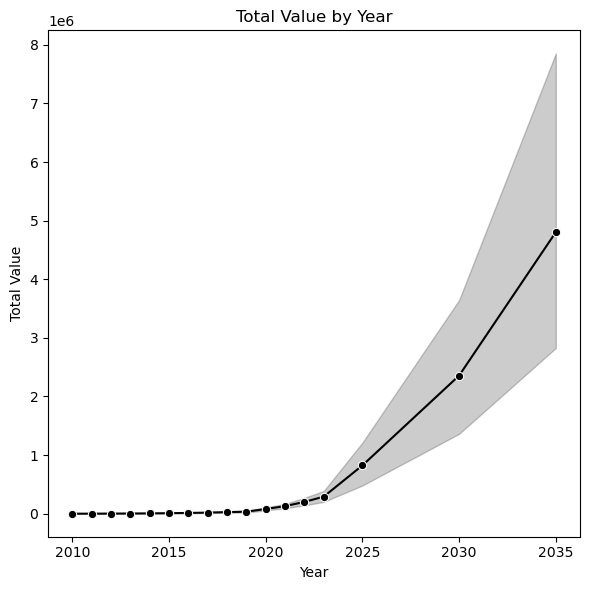

In [15]:
yearly_df = df.reset_index()

plt.figure(figsize=(6, 6))
sns.lineplot(data=df, x='year', y='value', marker='o', color= 'black')
plt.title('Total Value by Year')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show()


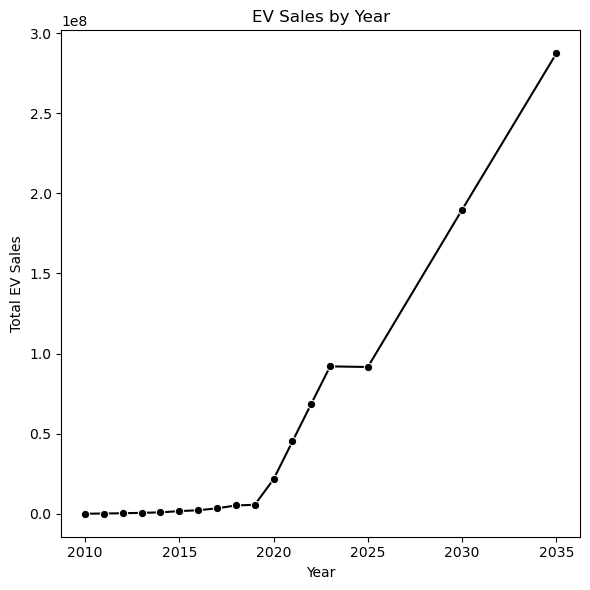

In [16]:
filtered_df = df[df['parameter'] == 'EV sales']
yearly_df = filtered_df.groupby('year')['value'].sum().reset_index()
plt.figure(figsize=(6, 6))
sns.lineplot(data=yearly_df, x='year', y='value', marker='o', color='black')
plt.title('EV Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.tight_layout()
plt.show()

Over the past decade, global EV adoption has experienced exponential growth, especially post-2018. From early 2010s when EV penetration was minimal, we've seen consistent upward trends in parameters such as EV stock share, EV sales share, EV sales, EV stock, EV charging points, Electricity demand, Oil displacement Mbd,Oil displacement, million lge.
In conclusion, The total global EV stock increased from a marginal base in 2010 to over 10x by 2023, reflecting a strong policy push, consumer demand, and innovation in powertrains.

In [18]:
df['parameter'].unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

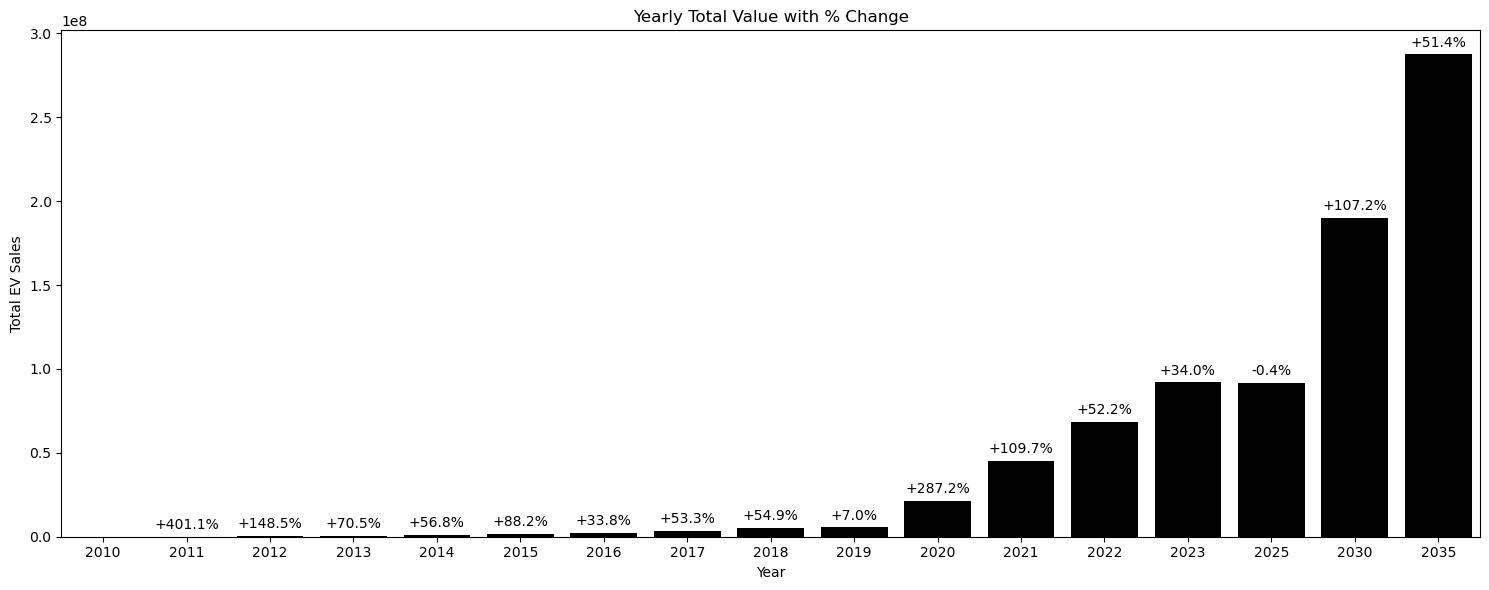

In [19]:
filtered_df = df[df['parameter'] == 'EV sales']
yearly_df = filtered_df.groupby('year')['value'].sum().reset_index()
yearly_df['pct_change'] = yearly_df['value'].pct_change() * 100 
plt.figure(figsize=(15,6))
ax=sns.barplot(data=yearly_df, x='year', y='value',color='black')
for i, row in yearly_df.iterrows():
    pct=row['pct_change']
    y_val=row['value']
    if pd.notnull(pct):
        ax.text(i, y_val + max(yearly_df['value']) * 0.01, 
                f'{pct:+.1f}%',
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Yearly Total Value with % Change')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.tight_layout()
plt.show()

Insight:

The years 2020 to 2023 marked the most significant leaps in EV growth across all categories. While the global economy was affected by the pandemic in 2020, EV adoption accelerated rather than slowed down — a unique case compared to ICE vehicle sales.

@ 2021: Recorded a nearly 2x increase in new EV registrations compared to 2020.

@ 2022-2023: Continued momentum driven by Europe and China, where supportive regulations and rising fuel prices increased EV demand.

Above graph confirm a structural shift rather than a short-term trend, suggesting market maturity and investor readiness.

In [21]:
ev_sales = df[df['parameter'] == 'EV sales']
sales_by_year = ev_sales.groupby('year')['value'].sum().sort_index()
yoy_growth = sales_by_year.pct_change() * 100
avg_yoy_growth = yoy_growth[1:].mean()
avg_yoy_growth

97.21963274842032

Average YoY growth of EV Sales from 2015 to 2023: 97.22%

In [23]:
ev_sales = df[df['parameter'] == 'EV sales']
region_year_sales = ev_sales.groupby(['region', 'year'])['value'].sum().unstack()
region_yoy_growth = region_year_sales.pct_change(axis=1) * 100
avg_region_yoy_growth = region_yoy_growth.loc[:, 2016:2023].mean(axis=1).dropna()
print("Average YoY Growth of EV Sales by Region (2015–2023):")
print(avg_region_yoy_growth.sort_values(ascending=False).round(2))


Average YoY Growth of EV Sales by Region (2015–2023):
region
Rest of the world       630.45
Israel                  346.26
United Arab Emirates    304.27
Cyprus                  210.40
India                   190.69
Costa Rica              187.53
Turkiye                 187.21
Brazil                  156.41
Bulgaria                145.95
Mexico                  135.45
Romania                 133.18
Slovenia                132.21
Greece                  122.83
Colombia                109.08
Slovakia                107.80
Europe                  105.61
Chile                    96.76
Croatia                  92.36
Poland                   92.29
Latvia                   90.48
Korea                    89.58
Seychelles               88.51
Lithuania                88.17
Estonia                  88.06
New Zealand              87.09
Hungary                  86.89
China                    85.62
World                    85.38
Australia                83.91
Czech Republic           83.41
Luxembour

Average YoY growth of EV Sales by region from 2015 to 2023: 97.22%

In [25]:
ev_sales = df[df['parameter'] == 'EV sales']
sales_by_year = ev_sales.groupby('year')['value'].sum().sort_index()
start_year = 2015
end_year = 2023
start_value = sales_by_year.loc[start_year]
end_value = sales_by_year.loc[end_year]
n = end_year - start_year
cagr = ((end_value / start_value) ** (1 / n) - 1) * 100
print(f"CAGR of EV Sales from {start_year} to {end_year}: {cagr:.2f}%")


CAGR of EV Sales from 2015 to 2023: 65.51%


The CAGR (Compound Annual Growth Rate) for global EV sales between 2015 and 2023 stands at 65.5%

## Regional Comparison

In [27]:
ev_sales = df[df['parameter'] == 'EV sales']
region_year_sales = ev_sales.groupby(['region', 'year'])['value'].sum().unstack()
region_year_sales = region_year_sales.sort_index(axis=1)
cagr_region = ((region_year_sales[2023] / region_year_sales[2015]) ** (1 / 8) - 1) * 100
cagr_region = cagr_region.dropna()
print("CAGR of EV Sales by Region (2015–2023):")
print(cagr_region.sort_values(ascending=False).round(2))


CAGR of EV Sales by Region (2015–2023):
region
Costa Rica           143.23
Israel               136.05
Romania              123.61
Brazil               121.70
Rest of the world    116.19
India                115.39
Turkiye              103.89
Greece               103.86
Mexico                87.62
Colombia              86.32
Poland                85.45
Bulgaria              78.46
Slovakia              78.25
China                 74.11
Hungary               73.92
Latvia                72.73
New Zealand           72.18
Finland               71.68
World                 68.84
Portugal              66.78
Estonia               66.00
Lithuania             65.67
Ireland               65.37
Australia             65.28
Italy                 64.78
Korea                 64.26
Europe                63.96
Spain                 63.36
Belgium               62.89
Czech Republic        58.58
USA                   56.75
Seychelles            55.01
Germany               53.16
Chile                 51.59
C

Above are the total CAGR of different types of regions. If we see that the World CAGR is 68.84%.

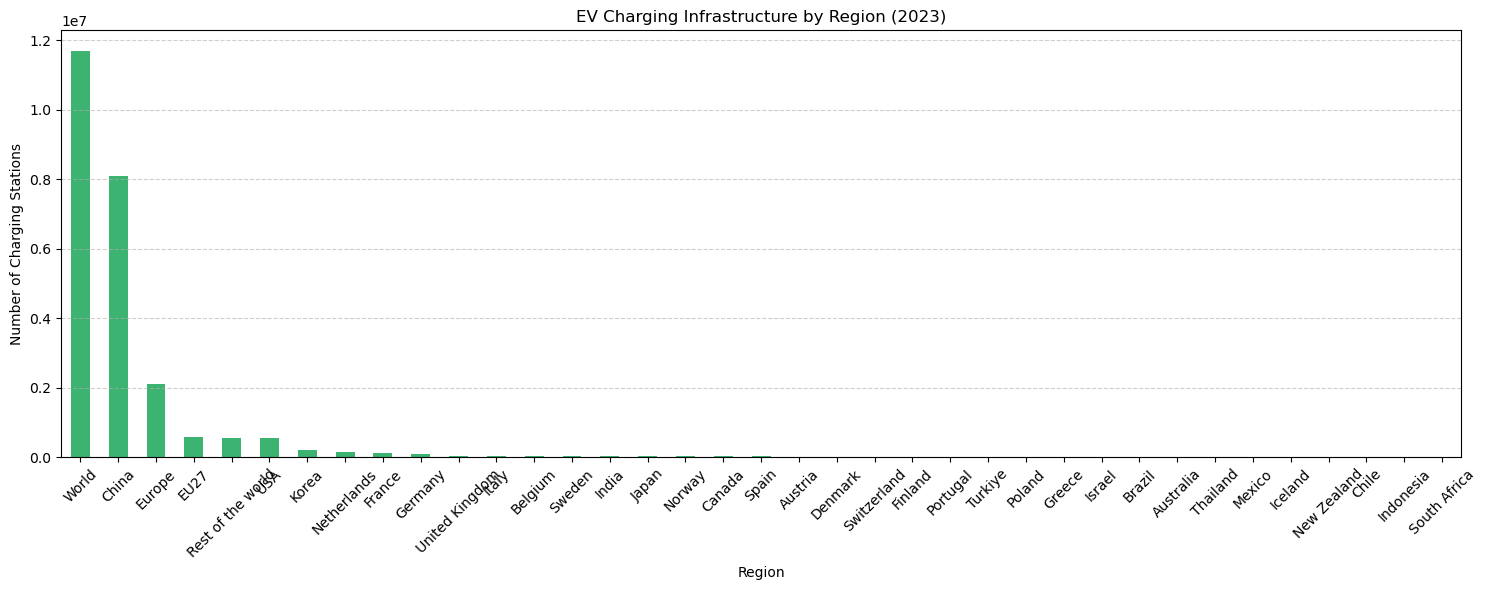

In [29]:
infra_df = df[df['unit'].str.contains('charging points', case=False)]
infra_2023 = infra_df[infra_df['year'] == 2023]
region_infra = infra_2023.groupby('region')['value'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
region_infra.plot(kind='bar', color='mediumseagreen')
plt.title('EV Charging Infrastructure by Region (2023)')
plt.xlabel('Region')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


So, we can see that china have the highest charging point. China used mored EV and so, it have more EV sales and high adoption rate.

## Category & Parameter-Based Analysis

In [31]:
para_summary= df.groupby('parameter')['value'].sum().sort_values(ascending= False)
para_summary

parameter
EV stock                         4.318026e+09
EV sales                         8.160755e+08
EV charging points               2.521943e+08
Electricity demand               1.674709e+07
Oil displacement, million lge    4.933790e+06
EV sales share                   1.229462e+04
EV stock share                   3.430211e+03
Oil displacement Mbd             8.448808e+01
Name: value, dtype: float64

In [32]:
from numpy import log
cagr_data = df.groupby(['parameter', 'year'])['value'].sum().reset_index()
cagr_pivot = cagr_data.pivot(index='parameter', columns='year', values='value')
cagr_pivot = cagr_pivot.dropna(subset=[2015, 2023])
years = 2023 - 2015
cagr_pivot['CAGR'] = ((cagr_pivot[2023] / cagr_pivot[2015]) ** (1/years) - 1) * 100
fastest_growing_params = cagr_pivot['CAGR'].sort_values(ascending=False)
print(fastest_growing_params.head(10))


parameter
Oil displacement, million lge    72.081798
Oil displacement Mbd             71.900462
EV stock                         71.834573
EV sales                         65.511232
EV charging points               64.409212
Electricity demand               55.046387
EV stock share                   49.964205
EV sales share                   44.274178
Name: CAGR, dtype: float64


In [33]:
gb= df.groupby(['parameter', 'category'])['value'].sum().reset_index()
gb

parameter          category         value
0              EV charging points        Historical  2.870621e+07
1              EV charging points    Projection-APS  1.141995e+08
2              EV charging points  Projection-STEPS  1.092886e+08
3                        EV sales        Historical  1.072611e+08
4                        EV sales    Projection-APS  3.758742e+08
5                        EV sales  Projection-STEPS  3.329403e+08
6                  EV sales share        Historical  6.266034e+03
7                  EV sales share    Projection-APS  3.238682e+03
8                  EV sales share  Projection-STEPS  2.789902e+03
9                        EV stock        Historical  3.044356e+08
10                       EV stock    Projection-APS  2.081643e+09
11                       EV stock  Projection-STEPS  1.931947e+09
12                 EV stock share        Historical  1.109401e+03
13                 EV stock share    Projection-APS  1.225078e+03
14                 EV stock share  Projection-STEPS  1.095733e+03
15             Electricity demand        Historical  8.795758e+05
16             Electricity demand    Projection-APS  8.546499e+06
17             Electricity demand  Projection-STEPS  7.321015e+06
18           Oil displacement Mbd        Historical  4.655309e+00
19           Oil displacement Mbd    Projection-APS  4.074568e+01
20           Oil displacement Mbd  Projection-STEPS  3.908708e+01
21  Oil displacement, million lge        Historical  2.743246e+05
22  Oil displacement, million lge    Projection-APS  2.400844e+06
23  Oil displacement, million lge  Projection-STEPS  2.258621e+06

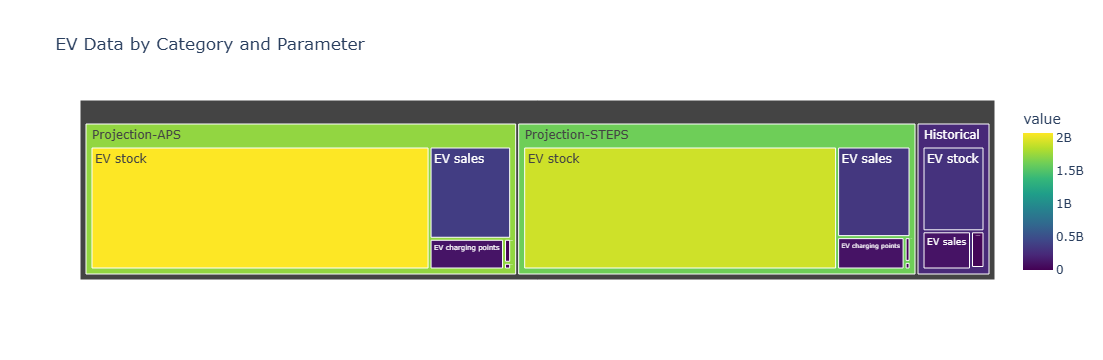

In [34]:
import plotly.express as px

fig = px.treemap(
    gb,
    path=['category', 'parameter'],
    values='value',
    title='EV Data by Category and Parameter',
    color='value',
    color_continuous_scale='Viridis'
)
fig.show()


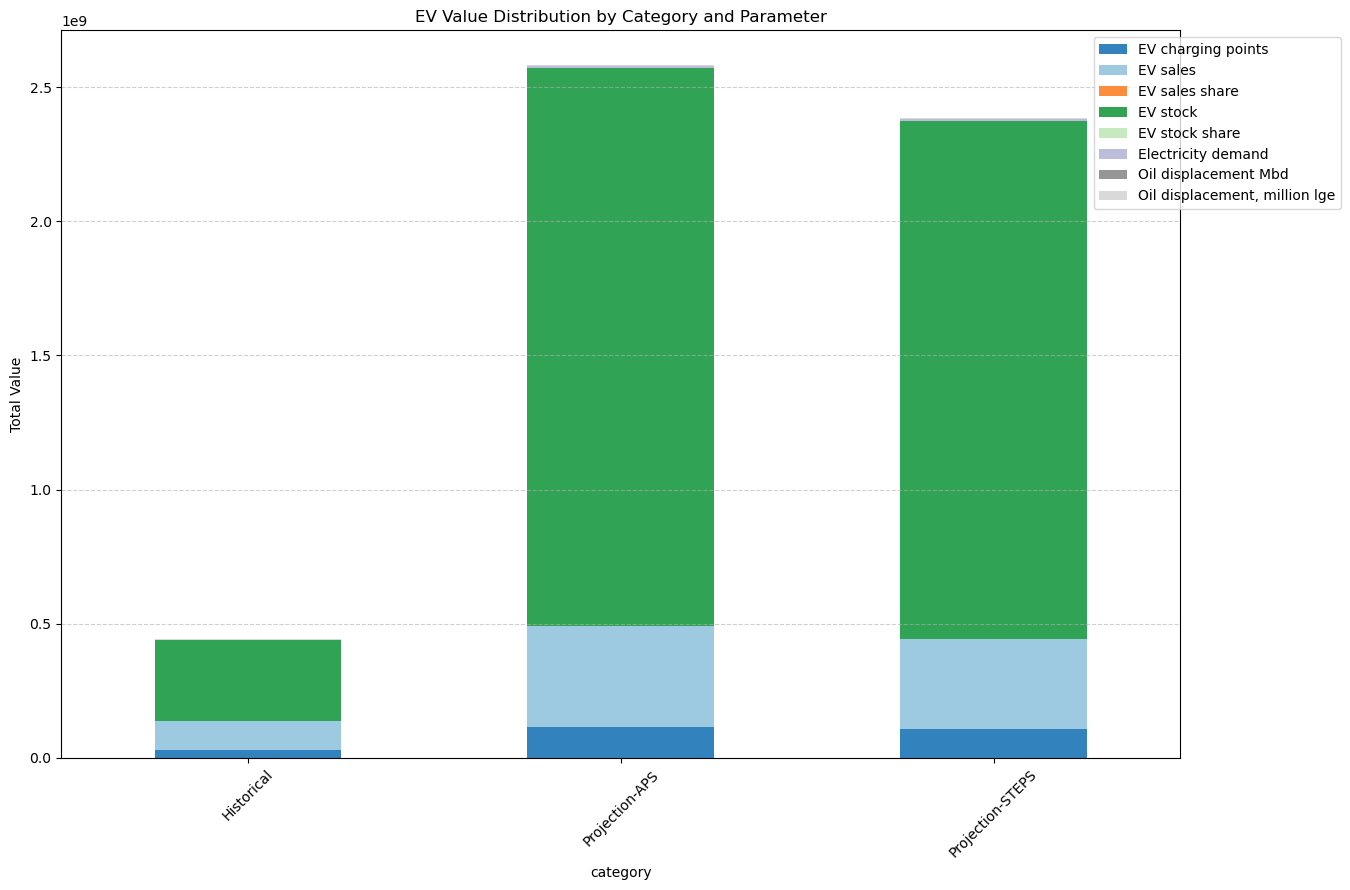

In [68]:
pivot_df = gb.pivot(index='category', columns='parameter', values='value').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 9), colormap='tab20c')
plt.title('EV Value Distribution by Category and Parameter')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


1.EV stock shows the highest growth across all categories, especially in projections (APS and STEPS), indicating strong global EV adoption.

2.EV sales and stock share also increase significantly, supporting a growing trend toward electric mobility.

3.Infrastructure (EV charging points) grows but remains a small fraction compared to vehicle growth — suggesting a potential under-support in infrastructure.

4.Projection-APS assumes more aggressive EV growth, yet charging infrastructure does not scale proportionately.

5.If infrastructure doesn't catch up, user experience and adoption could suffer due to range anxiety and charging delays.

6.This imbalance highlights the need for focused investment in charging networks, especially in high-growth regions.

7.Overall, there's a clear mismatch between EV growth and support infrastructure, which should be a key action point for policymakers and investors.

In [153]:
df.head(10)

region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   
5  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   
6  Australia  Historical  EV sales share  Cars         EV  2012   percent   
7  Australia  Historical  EV stock share  Cars         EV  2012   percent   
8  Australia  Historical        EV stock  Cars       PHEV  2012  Vehicles   
9  Australia  Historical        EV sales  Cars       PHEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  
5  170.00000  
6    0.03000  
7    0.00240  
8   80.00000  
9   80.00000

## Mode & Powertrain Distribution

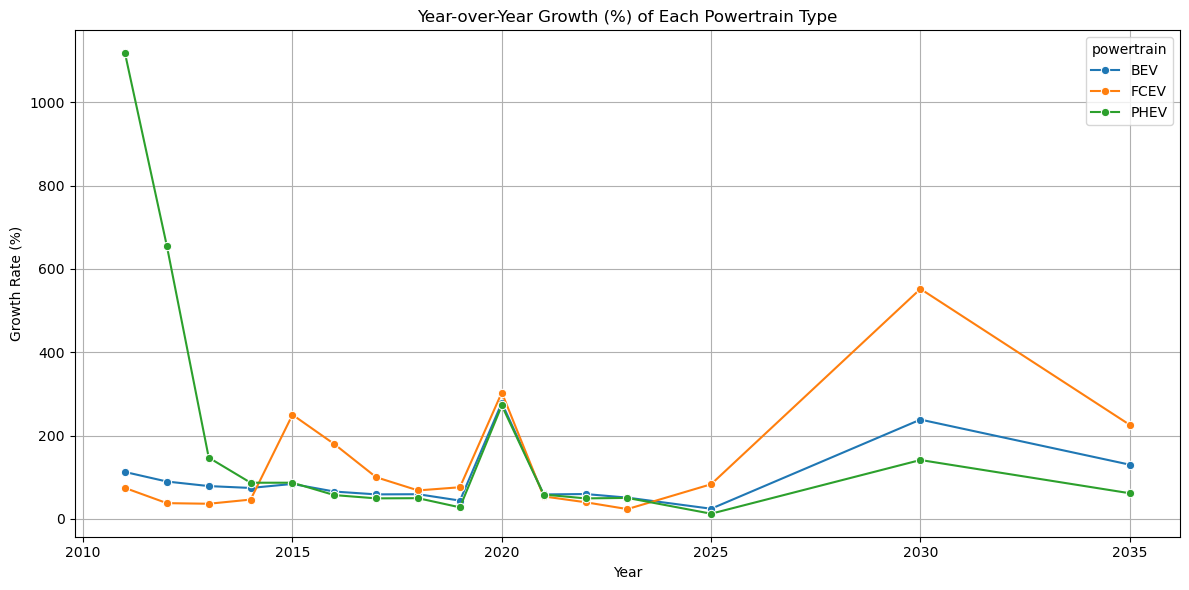

In [90]:
df_powertrain = df[df['parameter'].str.lower().isin(['ev stock', 'new ev registrations'])]
powertrain_yearly = df_powertrain.groupby(['year', 'powertrain'])['value'].sum().reset_index()
powertrain_yearly['growth'] = powertrain_yearly.groupby('powertrain')['value'].pct_change() * 100

powertrain_yearly['growth'] = powertrain_yearly['growth'].replace([float('inf'), -float('inf')], pd.NA) ##Replace infinite or NaN values
fastest_growth = powertrain_yearly.sort_values(['year', 'growth'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.lineplot(data=powertrain_yearly, x='year', y='growth', hue='powertrain', marker='o')
plt.title('Year-over-Year Growth (%) of Each Powertrain Type')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# Average growth rate over years
avg_growth = powertrain_yearly.groupby('powertrain')['growth'].mean().sort_values(ascending=False)
print("Average YoY Growth by Powertrain:\n", avg_growth)


Average YoY Growth by Powertrain:
 powertrain
PHEV    182.526928
FCEV    134.230004
BEV      94.039545
Name: growth, dtype: float64


PHEVs (Plug-in Hybrid EVs) showed an exceptional spike in early years, especially around 2011, with growth exceeding 1100%, indicating an early adoption phase. However, the growth rate has stabilized significantly since.

FCEVs (Fuel Cell EVs) displayed volatile but strong growth, peaking around 2020 and 2030 with 300%–550% growth, suggesting emerging interest and investment cycles.

BEVs (Battery EVs) had a more consistent and stable growth, particularly rising after 2025 and peaking around 2029–2030 at 240%, indicating mature adoption and policy-driven push.

Strategy:
Focus investments on BEVs for stable market returns, monitor FCEVs for innovation opportunities, and consider PHEVs as a transitional solution with declining momentum.

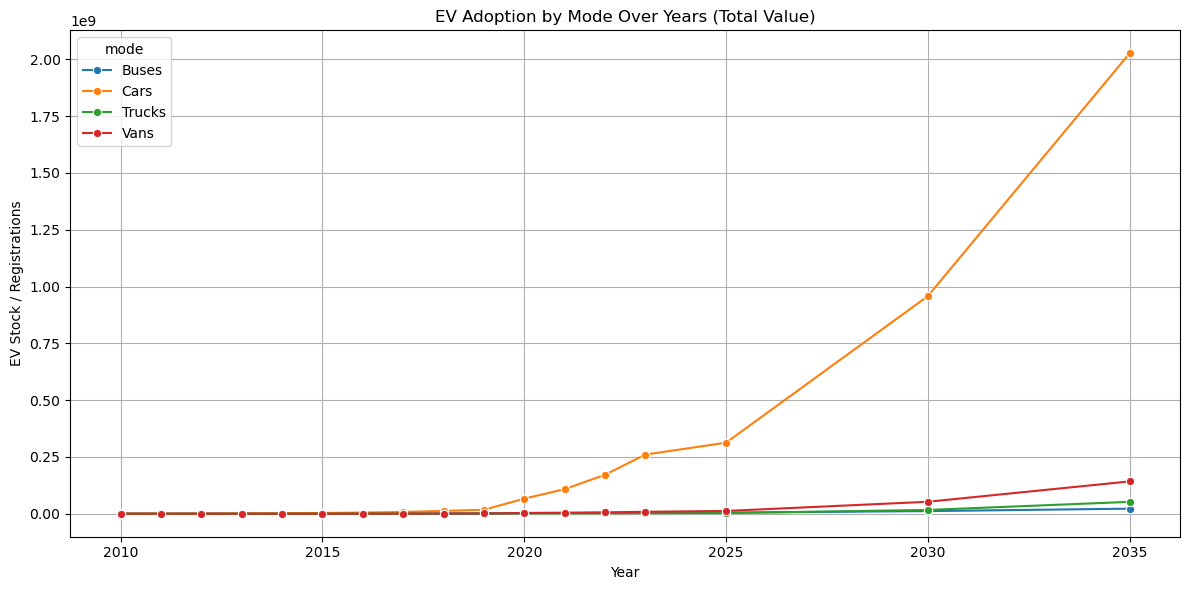

In [139]:
df_mode = df[df['parameter'].str.lower().isin(['ev stock', 'new ev registrations'])]
mode_yearly = df_mode.groupby(['year', 'mode'])['value'].sum().reset_index()
mode_yearly['growth'] = mode_yearly.groupby('mode')['value'].pct_change() * 100
mode_yearly['growth'] = mode_yearly['growth'].replace([float('inf'), -float('inf')], pd.NA)

plt.figure(figsize=(12, 6))
sns.lineplot(data=mode_yearly, x='year', y='value', hue='mode', marker='o')
plt.title('EV Adoption by Mode Over Years (Total Value)')
plt.xlabel('Year')
plt.ylabel('EV Stock / Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()

Over the years, BEVs have shown the most aggressive growth, especially after 2020. The curve representing BEVs rises sharply across all modes — particularly cars, which dominate the adoption trend. This indicates a strong market shift toward fully electric solutions, driven by policy support, charging infrastructure growth, and consumer preference for zero-emission vehicles.

🔹 PHEVs and FCEVs show comparatively slower and flatter growth curves, indicating they are not scaling as rapidly.

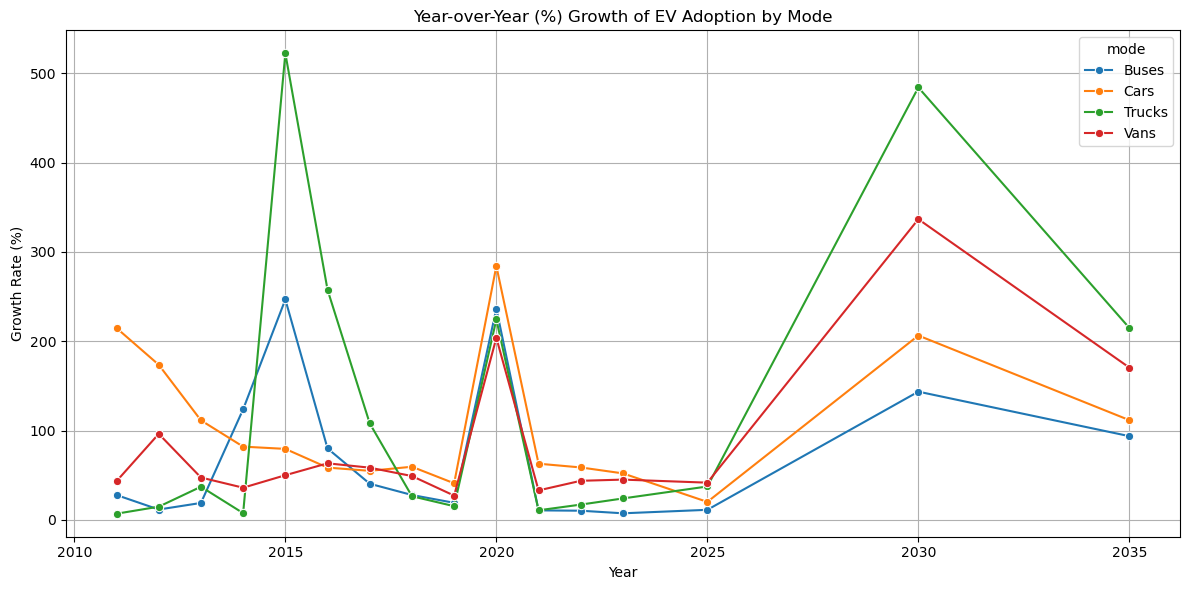

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mode_yearly, x='year', y='growth', hue='mode', marker='o')
plt.title('Year-over-Year (%) Growth of EV Adoption by Mode')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

1.Trucks show the fastest growth spikes (e.g. 520% in 2015, 480% in 2030), but the trend is volatile — likely driven by policy or fleet-based adoption.

2.Cars have the most consistent and stable growth, peaking around 280% in 2020. This indicates strong, steady consumer adoption and market maturity.

3.Vans see a sharp rise post-2025, likely due to e-commerce and last-mile delivery electrification.

4.Buses had high growth around 2020, aligned with government-led public transport initiatives, but growth tapers off later.

## EV Infrastructure

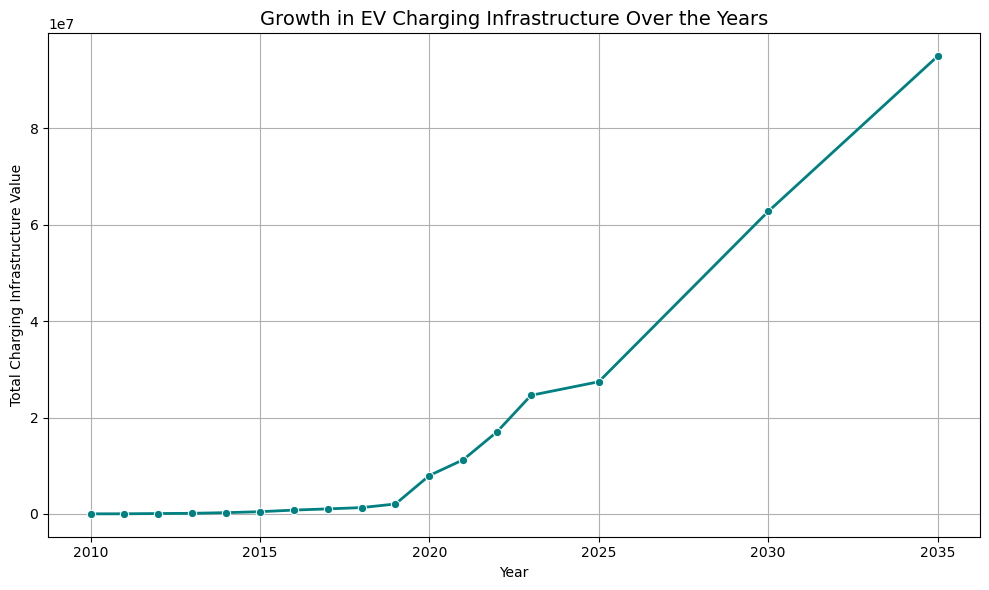

In [171]:
infra_df = df[df['unit'] == 'charging points']
yearly_infra = infra_df.groupby('year')['value'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_infra, x='year', y='value', marker='o', linewidth=2, color='teal')
plt.title("Growth in EV Charging Infrastructure Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Charging Infrastructure Value")
plt.grid(True)
plt.tight_layout()
plt.show()

EV charging infrastructure has grown rapidly post-2020, with major investments scaling up to $95 million by 2035. This sharp rise aligns with increasing EV adoption and shows strong support for future EV demand.


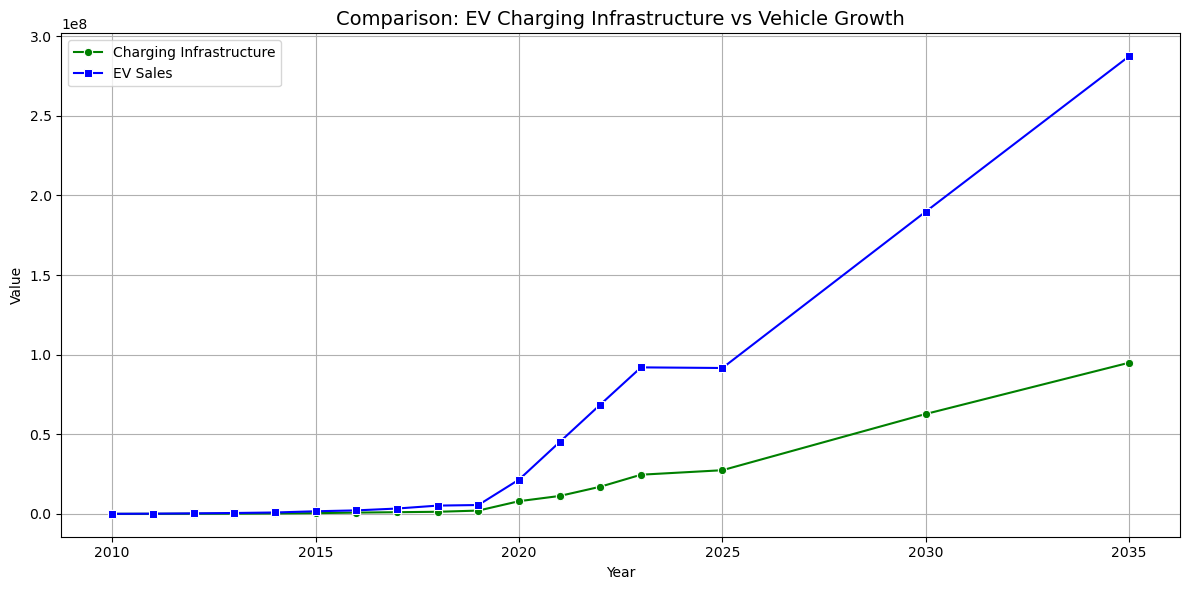

In [169]:
infra_df = df[df['unit'].str.lower().str.contains('charging points')]
infra_yearly = infra_df.groupby('year')['value'].sum().reset_index()
infra_yearly.rename(columns={'value': 'charging_infra'}, inplace=True)
vehicle_df = df[df['parameter'].str.lower().str.contains('ev sales')]
vehicle_yearly = vehicle_df.groupby('year')['value'].sum().reset_index()
vehicle_yearly.rename(columns={'value': 'vehicle_stock'}, inplace=True)
merged_df = pd.merge(infra_yearly, vehicle_yearly, on='year', how='inner')
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df, x='year', y='charging_infra', marker='o', label='Charging Infrastructure', color='green')
sns.lineplot(data=merged_df, x='year', y='vehicle_stock', marker='s', label='EV Sales', color='blue')
plt.title("Comparison: EV Charging Infrastructure vs Vehicle Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

EV vehicle growth is significantly outpacing charging infrastructure**, especially post-2020. While both trends are upward, the gap between EV adoption and infrastructure expansion is widening, highlighting the urgent need for faster infrastructure scaling to support future demand and avoid bottlenecks.


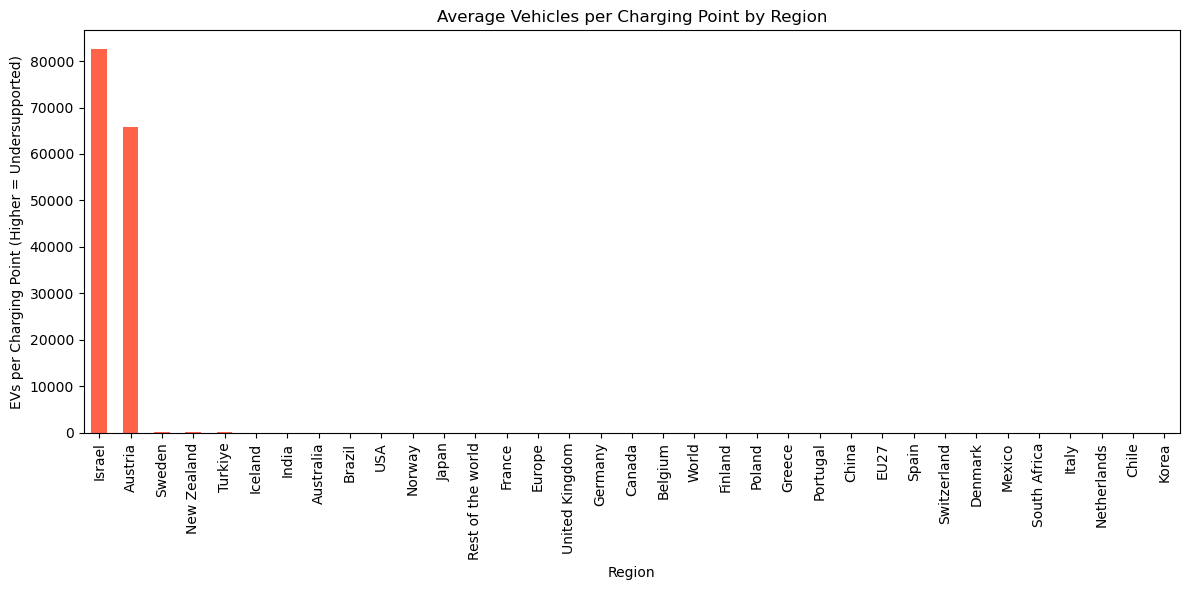

In [131]:
infra_df = df[df['unit'].str.lower().str.contains('charging points')]
vehicle_df = df[df['parameter'].str.lower().str.contains('ev stock')]
infra_grouped = infra_df.groupby(['region', 'year'])['value'].sum().reset_index(name='infrastructure')
vehicle_grouped = vehicle_df.groupby(['region', 'year'])['value'].sum().reset_index(name='vehicles')
merged = pd.merge(vehicle_grouped, infra_grouped, on=['region', 'year'], how='inner')
merged['vehicles_per_infra'] = merged['vehicles'] / merged['infrastructure']
region_ratio = merged.groupby('region')['vehicles_per_infra'].mean().sort_values(ascending=False)

region_ratio.plot(kind='bar', figsize=(12,6), color='tomato')
plt.title('Average Vehicles per Charging Point by Region')
plt.ylabel('EVs per Charging Point (Higher = Undersupported)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

The above graph shows the charging points gap in Israel and Austria, where the number of EVs per charging point is extremely high—over 80,000 in Israel—indicating severe under-support. In contrast, other regions maintain a healthier EV-to-charger ratio. This suggests an urgent need for infrastructure investment in these under-supported regions to match their growing EV adoption.

## Market Share Analysis 

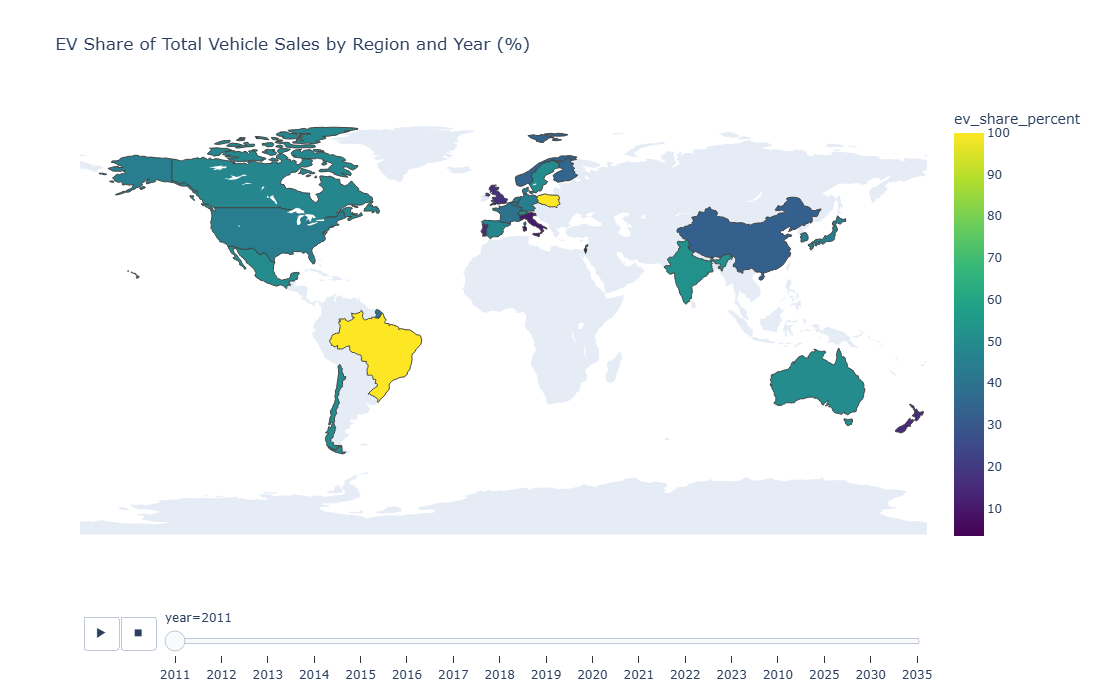

In [206]:
sales_df = df[df['parameter'].str.lower() == 'ev sales']
ev_sales = sales_df.groupby(['region', 'year'])['value'].sum().reset_index()
ev_sales.rename(columns={'value': 'ev_sales'}, inplace=True)
total_sales_df = df[df['unit'].str.lower() == 'vehicles']
total_sales = total_sales_df.groupby(['region', 'year'])['value'].sum().reset_index()
total_sales.rename(columns={'value': 'total_sales'}, inplace=True)
merged_sales = pd.merge(ev_sales, total_sales, on=['region', 'year'])
merged_sales['ev_share_percent'] = (merged_sales['ev_sales'] / merged_sales['total_sales']) * 100

fig = px.choropleth(
    merged_sales,
    locations="region",
    locationmode="country names",
    color="ev_share_percent",
    hover_name="region",
    animation_frame="year",
    color_continuous_scale="Viridis",
    title="EV Share of Total Vehicle Sales by Region and Year (%)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    width=1150,
    height=700)
fig.show()

## A small forcasting/ prediction according to above datasets

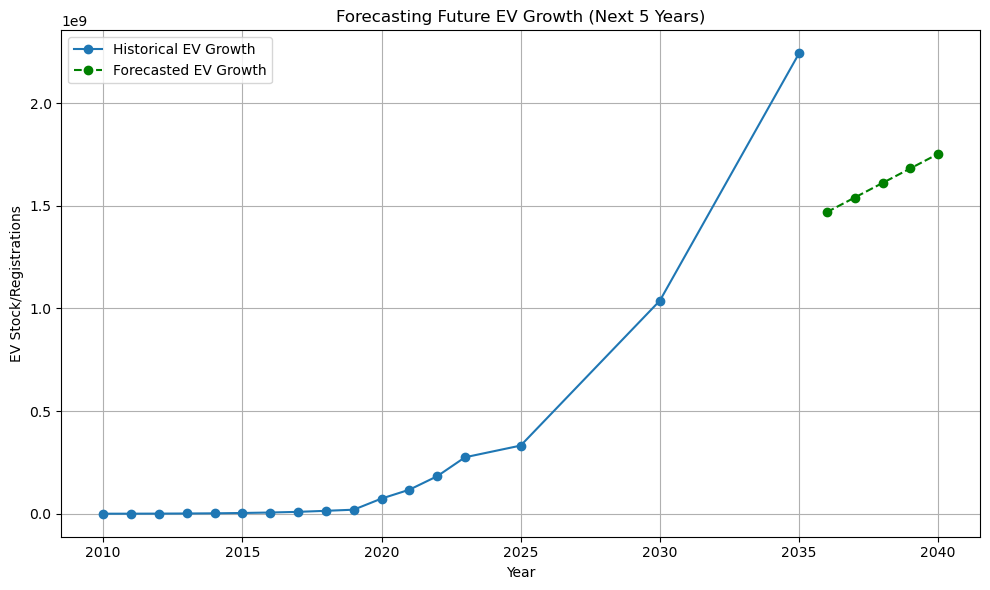

In [181]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Filter dataset for EV stock or registrations globally
ev_df = df[df['parameter'].str.lower().str.contains("stock|registrations")]
ev_df = ev_df.groupby("year")["value"].sum().reset_index()
# Prepare data
X = ev_df['year'].values.reshape(-1, 1)
y = ev_df['value'].values

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Forecast next 5 years
future_years = np.arange(ev_df['year'].max() + 1, ev_df['year'].max() + 6).reshape(-1, 1)
future_preds = model.predict(future_years)

# Combine historical and forecasted data
forecast_df = pd.DataFrame({
    "year": future_years.flatten(),
    "predicted_value": future_preds
})
plt.figure(figsize=(10, 6))
plt.plot(ev_df['year'], ev_df['value'], marker='o', label='Historical EV Growth')
plt.plot(forecast_df['year'], forecast_df['predicted_value'], marker='o', linestyle='--', color='green', label='Forecasted EV Growth')
plt.xlabel('Year')
plt.ylabel('EV Stock/Registrations')
plt.title('Forecasting Future EV Growth (Next 5 Years)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Historical data shows exponential EV growth from 2010 to 2035, with a steep rise after 2020.

Forecast indicates continued positive momentum, with EV stock/registrations expected to grow steadily over the next 5 years.

This trend suggests strong market confidence, technological adoption, and policy support.

Businesses in EV manufacturing, charging infra, and energy sectors can strategically invest to align with this upward trajectory.